In [2]:
import cv2
import copy as c
import matplotlib.pyplot as plt
import os
from pathlib import Path

**Read data**

In [3]:
imgs = []
labels = []
for filename in os.listdir('./dataset/images/'):
    img = cv2.imread(os.path.join('./dataset/images/',filename))
    if img is not None:
            imgs.append(img)
            with open("./dataset/labels/{}.txt".format(Path(filename).stem),'r') as f:
                lines = f.readlines()
            labels.append(lines)

In [4]:
# print(imgs)
print(labels)
print(len(labels))

[['0 0.498046875 0.292057761732852 0.119140625 0.10758122743682311'], ['0 0.3943359375 0.325390125 0.139063 0.192188\n', '0 0.6656245 0.315625 0.1421880000000001 0.189062'], ['0 0.2209375 0.4151388225584594 0.078125 0.14449399999999998\n', '0 0.3569921875 0.32394094910591476 0.085625 0.167401\n', '0 0.6877734375 0.2591553287482806 0.12312500000000004 0.23259900000000003'], ['0 0.09109375 0.4865220414507772 0.024999999999999994 0.03233900000000001\n', '0 0.4146875 0.7943527772020724 0.048750000000000016 0.08457700000000003\n', '0 0.5009375 0.7248044507772021 0.04750000000000004 0.09038100000000002\n', '0 0.7919140625 0.8028965440414508 0.04937500000000006 0.158374\n', '0 0.8465625 0.5360630829015544 0.04812499999999997 0.06384800000000002'], ['0 0.6238847748776509 0.5287109375 0.607516 0.57625'], ['0 0.029296875 0.6856770833333332 0.059375 0.09687500000000004\n', '0 0.4150393125 0.5226565833333333 0.24609300000000006 0.519791\n', '0 0.74609375 0.37890625 0.242969 0.4770830000000001'], [

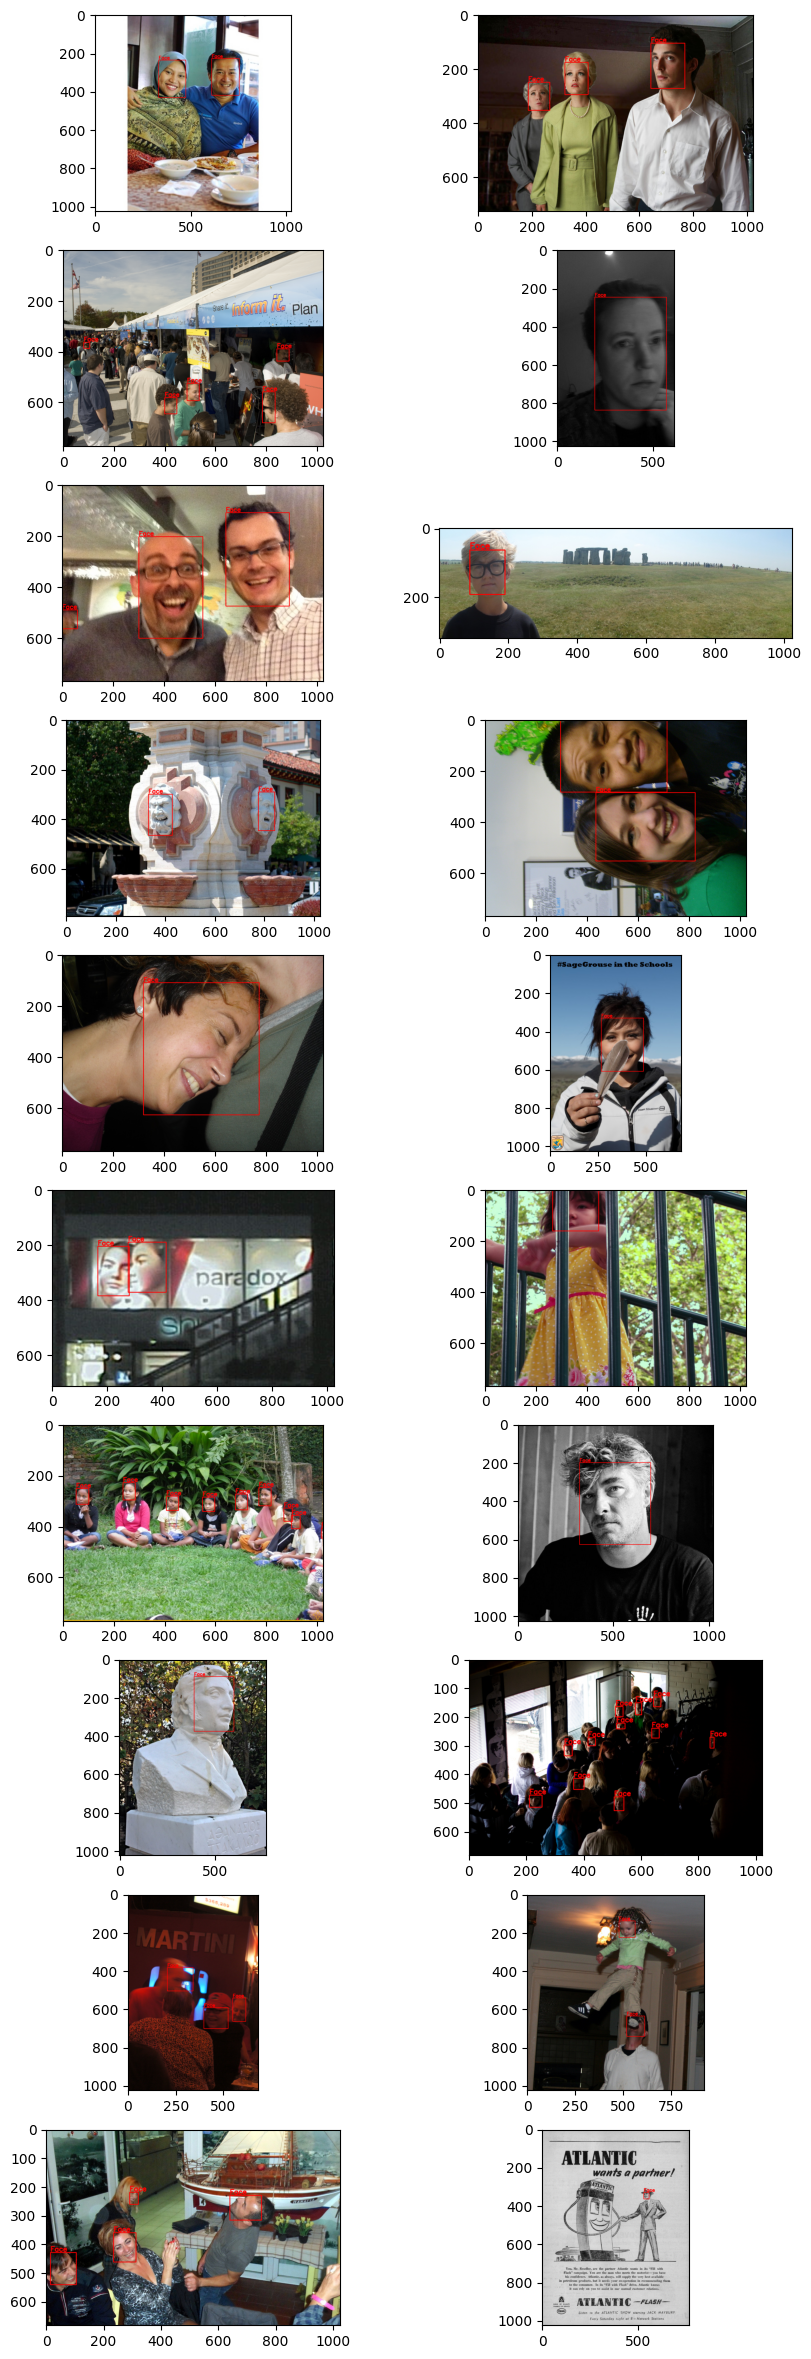

In [5]:
w = 10
h = 10
fig = plt.figure(figsize=(10, 30))
columns = 2
rows = 10
imgs_labeled = c.deepcopy(imgs)
for i in range(1, columns*rows +1):
    img = cv2.cvtColor(imgs_labeled[i], cv2.COLOR_BGR2RGB)
    H, W, _ = img.shape
    for label in labels[i]:
        x,y,w,h = label.split(' ')[1:]
        x = int(float(x) * W)
        y = int(float(y) * H)
        w = int(float(w) * W)
        h = int(float(h) * H)
        cv2.rectangle(img, (x-w//2,y-h//2),(x+w//2,y+h//2),(255,0,0),2)
        cv2.putText(img, 'Face', (x-w//2, (y-h//2)-4), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,0,0), 2, cv2.LINE_AA)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

**Using haar cascade**

In [6]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [7]:
def draw_boundary(img, classifier, scaleFactor, minNeighbors, color, text):
    # Converting image to gray-scale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # detecting features in gray-scale image, returns coordinates, width and height of features
    features = classifier.detectMultiScale(gray_img, scaleFactor, minNeighbors)
    coords = []
    # drawing rectangle around the feature and labeling it
    for (x, y, w, h) in features:
        cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
        cv2.putText(img, text, (x, y-4), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2, cv2.LINE_AA)
        coords = [x, y, w, h]
    return coords, img

In [8]:
def detect(img, faceCascade):
    color = {"blue":(255,0,0), "red":(0,0,255), "green":(0,255,0), "white":(255,255,255)}
    coords, img = draw_boundary(img, faceCascade, 1.1, 10, color['red'], "Face")
    return img

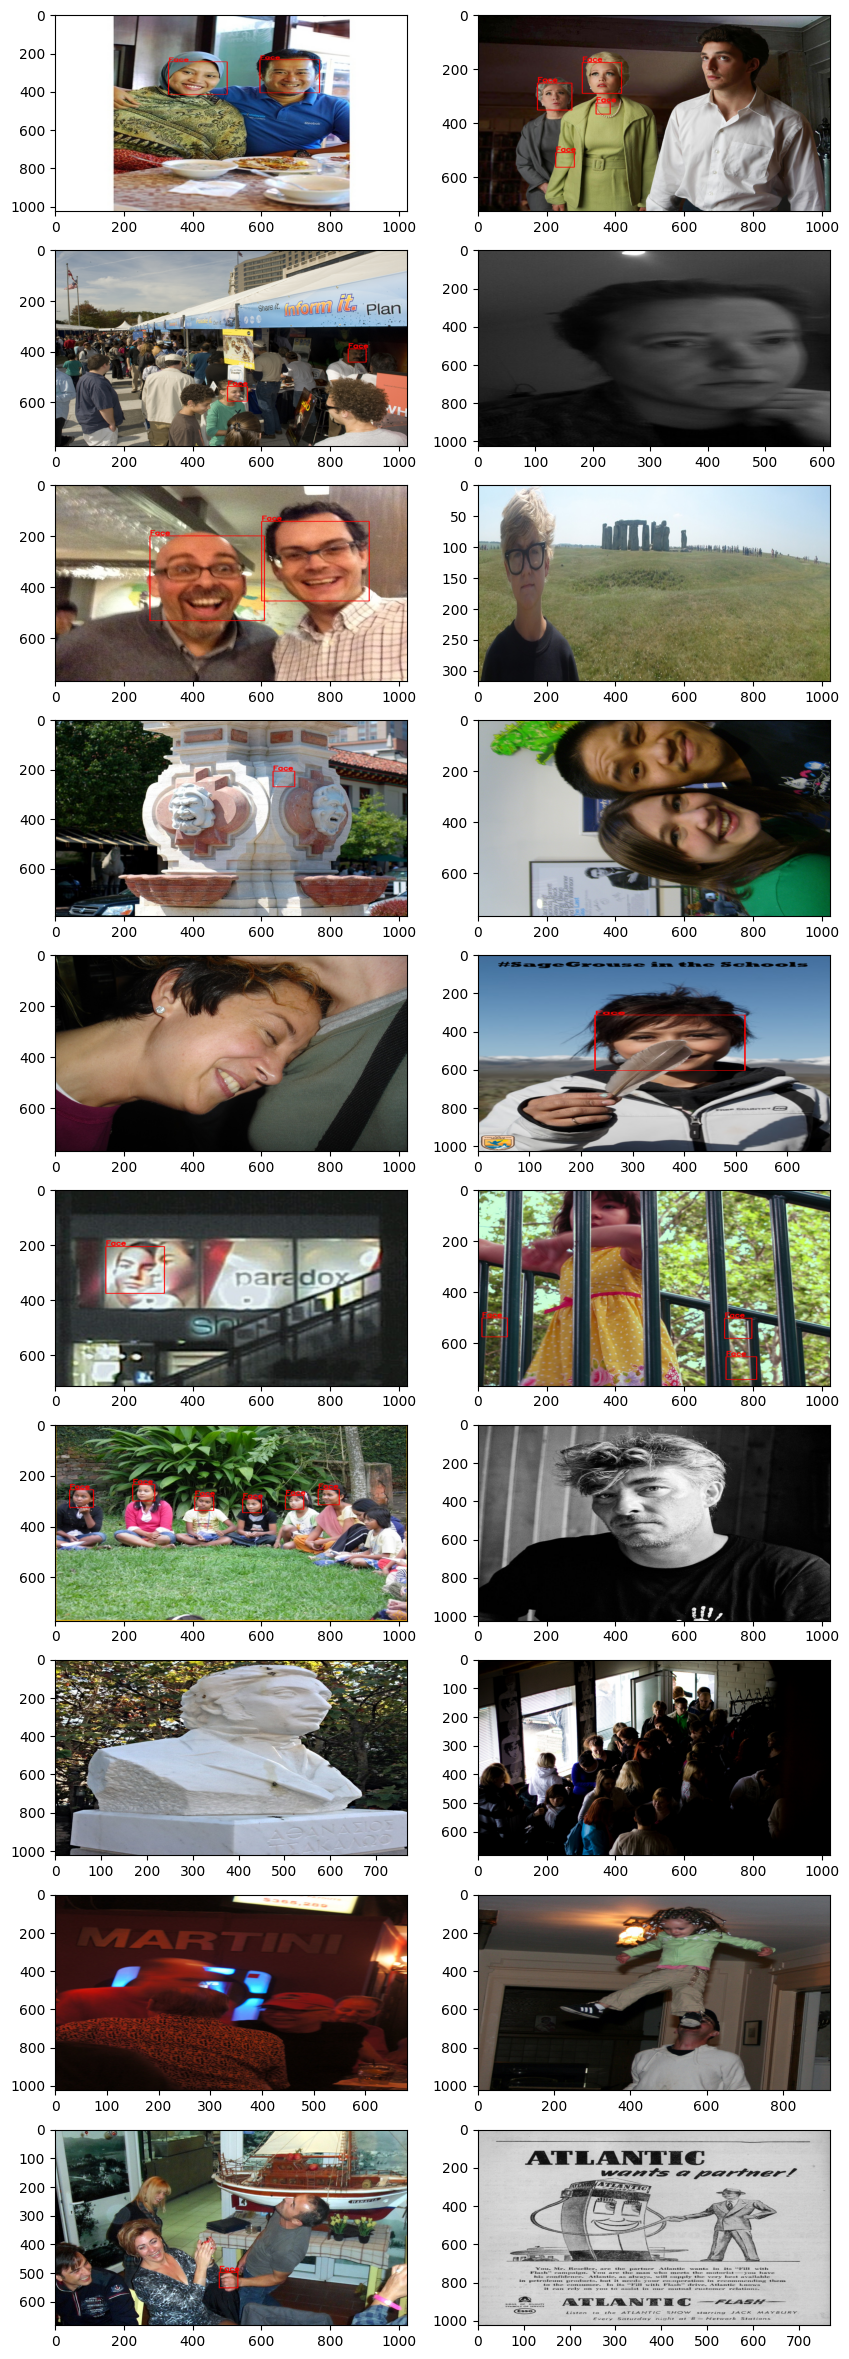

In [9]:
w = 10
h = 10
fig = plt.figure(figsize=(10, 30))
columns = 2
rows = 10
for i in range(1, columns*rows +1):
    img = detect(imgs[i], faceCascade)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, aspect='auto')
plt.show()

**Train model**